In [179]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [180]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [181]:
from sklearn import preprocessing
data = pd.read_csv('/content/abalone_train.csv')

data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.18000,0.13500,0.08000,0.03300,0.01450,0.00700,0.01000,5
1,3521,I,0.21500,0.15000,0.05500,0.04100,0.01500,0.00900,0.01250,3
2,883,M,0.66000,0.53000,0.17000,1.39050,0.59050,0.21200,0.45300,15
3,3627,M,0.71500,0.52500,0.20000,1.89000,0.95000,0.43600,0.43050,10
4,2106,M,0.59500,0.45500,0.15500,1.04100,0.41600,0.21050,0.36500,14


In [182]:
data_op_ori = pd.read_csv('/content/abalone_test.csv')
data_ori = pd.read_csv('/content/abalone_train.csv')

In [183]:
data_op = pd.read_csv('/content/abalone_test.csv')

In [184]:
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [185]:
label_encoder = preprocessing.LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])


label_encoder = preprocessing.LabelEncoder()
data_op["Sex"] = label_encoder.fit_transform(data_op["Sex"])

In [186]:


data.groupby("Rings").count()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Rings,,,,,,,,,
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,10,10,10,10,10,10,10,10,10
4,46,46,46,46,46,46,46,46,46
5,82,82,82,82,82,82,82,82,82
6,212,212,212,212,212,212,212,212,212
7,293,293,293,293,293,293,293,293,293
8,455,455,455,455,455,455,455,455,455
9,562,562,562,562,562,562,562,562,562


In [187]:
data.describe()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000
mean,2085.44208,1.05208,0.52589,0.40946,0.14013,0.83818,0.36360,0.18251,0.24139,9.95840
std,1197.72185,0.82639,0.11976,0.09889,0.04262,0.49379,0.22416,0.11044,0.13983,3.20559
min,0.00000,0.00000,0.07500,0.05500,0.00000,0.00200,0.00100,0.00050,0.00150,1.00000
25%,1055.00000,0.00000,0.45000,0.35000,0.11500,0.44450,0.18800,0.09350,0.13200,8.00000
50%,2086.00000,1.00000,0.54500,0.42500,0.14500,0.81000,0.34150,0.17250,0.23500,10.00000
75%,3114.00000,2.00000,0.62000,0.48500,0.16500,1.16850,0.50950,0.25550,0.33000,11.00000
max,4175.00000,2.00000,0.81500,0.65000,1.13000,2.77950,1.48800,0.76000,1.00500,27.00000


In [188]:
data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,1,0.18000,0.13500,0.08000,0.03300,0.01450,0.00700,0.01000,5
1,3521,1,0.21500,0.15000,0.05500,0.04100,0.01500,0.00900,0.01250,3
2,883,2,0.66000,0.53000,0.17000,1.39050,0.59050,0.21200,0.45300,15
3,3627,2,0.71500,0.52500,0.20000,1.89000,0.95000,0.43600,0.43050,10
4,2106,2,0.59500,0.45500,0.15500,1.04100,0.41600,0.21050,0.36500,14


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
Id                3341 non-null int64
Sex               3341 non-null int64
Length            3341 non-null float64
Diameter          3341 non-null float64
Height            3341 non-null float64
Whole_weight      3341 non-null float64
Shucked_weight    3341 non-null float64
Viscera_weight    3341 non-null float64
Shell_weight      3341 non-null float64
Rings             3341 non-null int64
dtypes: float64(7), int64(3)
memory usage: 261.1 KB


In [190]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
  
    print(); print(to_drop)


[]


In [191]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('Id', axis = 1,inplace=True)

data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('Id', axis = 1,inplace=True)

In [192]:
x=pd.DataFrame(data)
x.drop("Rings",axis =1,inplace=True)


In [193]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.18000,0.13500,0.08000,0.03300,0.01450,0.00700,0.01000
1,1,0.21500,0.15000,0.05500,0.04100,0.01500,0.00900,0.01250
2,2,0.66000,0.53000,0.17000,1.39050,0.59050,0.21200,0.45300
3,2,0.71500,0.52500,0.20000,1.89000,0.95000,0.43600,0.43050
4,2,0.59500,0.45500,0.15500,1.04100,0.41600,0.21050,0.36500


In [194]:
y=data["Rings"]
y.head()

0     5
1     3
2    15
3    10
4    14
Name: Rings, dtype: int64

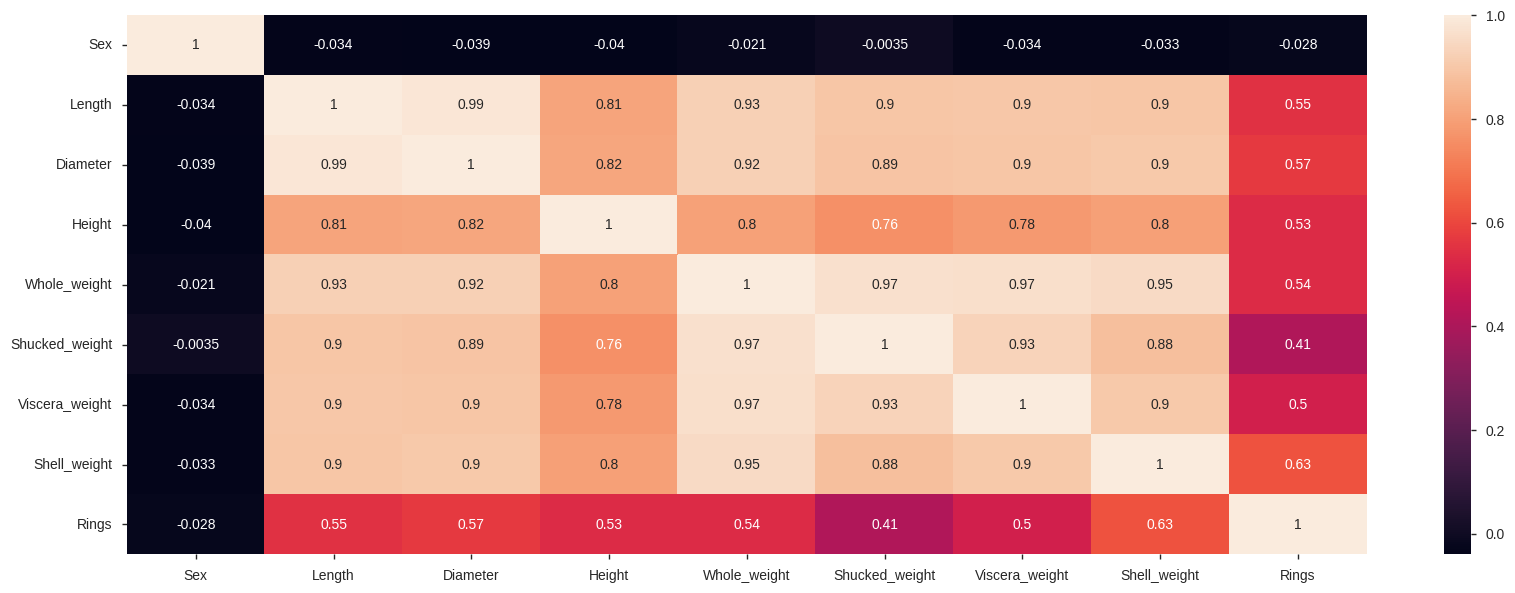

In [195]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [196]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [198]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3307, 8)
(3307,)
(34, 8)
(34,)


In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()

#param_grid = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
 #                'max_depth': list(range(2,500)),
  #              'max_features': ['auto', 'sqrt', 'log2'],
   #             'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




LinearRegression()

In [201]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [202]:
y_test_pred_op = lr.predict(x_test)


In [203]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,13.08525
1,9.65698


In [204]:

op = pd.DataFrame(data_op_ori["Id"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('Id')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['Id', 'OP']

op.head(2)


,Id,OP
0,668,13.08525
1,1580,9.65698


In [205]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [206]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [207]:
x_test.shape

(836, 8)

In [208]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))